In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
boston= datasets.load_boston()
boston.DESCR
print(boston.keys())
print(boston.data)
print(boston.target)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 2

In [4]:
X= boston.data
y=boston.target
print(type(X))

<class 'numpy.ndarray'>


In [7]:
X_new = X[:, 5]
X_new= X_new.reshape(-1,1)
y = y.reshape(-1,1)
print(X_new.shape)
print(y.shape)

(506, 1)
(506, 1)


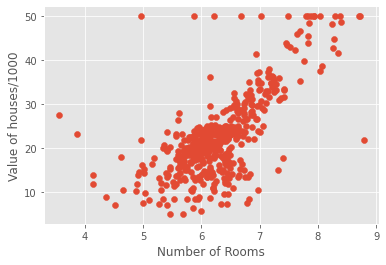

In [8]:
plt.scatter(X_new, y)
plt.xlabel("Number of Rooms")
plt.ylabel("Value of houses/1000")
plt.show()

[[23.83943626]
 [26.95782721]
 [19.89129801]
 [20.63898239]
 [22.7543821 ]
 [22.59025626]
 [19.26214896]
 [21.63285553]
 [22.13435115]
 [20.2924945 ]
 [19.59951874]
 [20.08277815]
 [ 6.54239639]
 [22.16170546]
 [17.3838199 ]
 [28.9820459 ]
 [18.94301538]
 [ 9.83403128]
 [37.14274737]
 [21.73315465]
 [22.23465027]
 [24.441231  ]
 [17.42941041]
 [25.45334035]
 [20.10101436]
 [14.82163319]
 [18.89742487]
 [26.68428415]
 [19.68158166]
 [18.16797669]
 [16.143758  ]
 [23.93061728]
 [32.01837393]
 [14.22895654]
 [20.07366005]
 [17.39293801]
 [30.85125685]
 [18.85183436]
 [20.62986429]
 [22.28024078]
 [14.48426341]
 [27.78757451]
 [38.59252561]
 [16.34435625]
 [23.84855436]
 [17.42941041]
 [17.31999319]
 [23.84855436]
 [21.56902881]
 [25.28921451]
 [20.12836867]
 [28.87262867]
 [21.34107626]
 [27.16754356]
 [33.44991598]
 [22.89115363]
 [22.04317013]
 [27.89699174]
 [23.5932475 ]
 [16.44465538]
 [26.99429962]
 [31.43481539]
 [25.07949816]
 [15.08605815]
 [25.32568692]
 [14.0648307 ]
 [24.34093

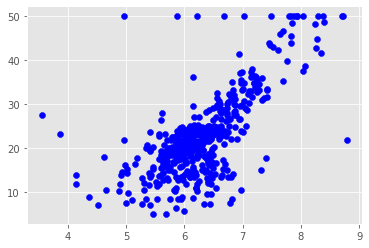

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
prediction_space=np.linspace(min(X_new), max(X_new)).reshape(-1,1)

#Display the prediction
print(y_pred)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

#Plot the graph
plt.scatter(X_new, y, color='blue')
#plt.plot(prediction_space, reg.predict(X_new), color='black', linewidth=3)
plt.show()

In [10]:
#Cross validation
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(reg, X_train, y_train, cv=5)
print(cv_score)
print(np.mean(cv_score))

[0.61738891 0.10584306 0.51356669 0.47071303 0.54817879]
0.45113809663458004


In [12]:
#Ridge regression to deal with overfitting and underfitting
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test, y_test)

0.45461913131426546

In [13]:
#Lasso Regression to deal with overfitting and underfitting
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred=lasso.predict(X_test)
lasso.score(X_test, y_test)

0.41832458103854697

[-0.          0.         -0.          0.         -0.          2.95469455
 -0.          0.         -0.         -0.         -0.24795837  0.
 -0.42817439]


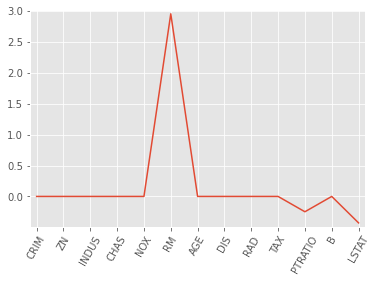

In [14]:
#Lasso Regression for feature selection
# Compute and print the coefficients
lasso_coef = lasso.fit(boston.data, boston.target).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(boston.feature_names)), lasso_coef)
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60)
plt.margins(0.02)
plt.show()